# Compression Results

## Dictonary Encoding

In [6]:
# imports
%matplotlib inline
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 9 artists>

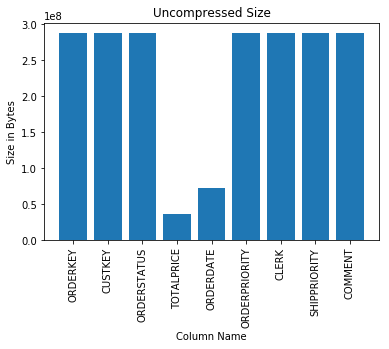

In [7]:
data = pd.read_csv('../data/dictionary/uncompressed_size.csv', sep=',')
plot = plt.bar(data.columns.tolist(), list(data.iloc[0]))
plt.xticks(rotation=90)
plt.title('Uncompressed Size')
plt.ylabel('Size in Bytes')
plt.xlabel('Column Name')
plot

Text(0.5,0,'Column Name')

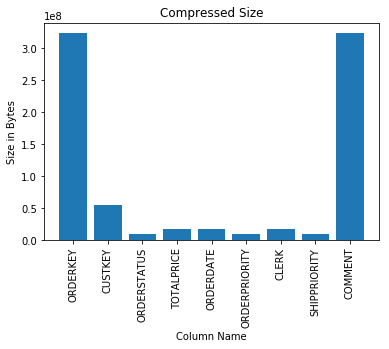

In [8]:
data = pd.read_csv('../data/dictionary/compressed_size.csv', sep=',')
plot = plt.bar(data.columns.tolist(), list(data.iloc[0]))
plt.xticks(rotation=90)
plt.title('Compressed Size')
plt.ylabel('Size in Bytes')
plt.xlabel('Column Name')

Text(0.5,0,'Column Name')

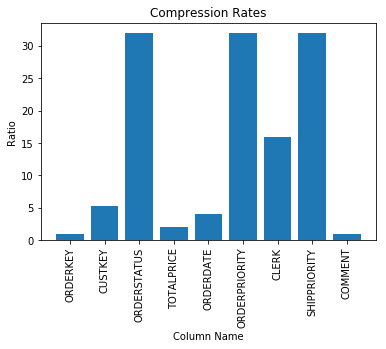

In [9]:
data = pd.read_csv('../data/dictionary/compression_ratios.csv', sep=',')
plot = plt.bar(data.columns.tolist(), list(data.iloc[0]))
plt.xticks(rotation=90)
plt.title('Compression Rates')
plt.ylabel('Ratio')
plt.xlabel('Column Name')

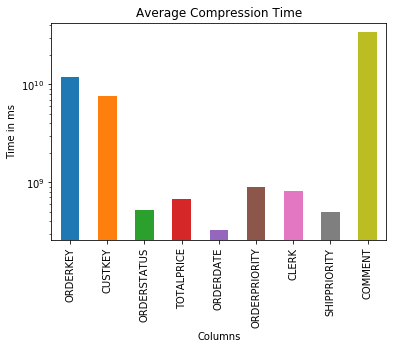

In [10]:
data = pd.read_csv('../data/dictionary/compression_times.csv', sep=',')
ax = data.apply(pd.Series.mean).plot(kind='bar', title='Average Compression Time', logy=True)
ax.set(xlabel='Columns', ylabel='Time in ms')
ax

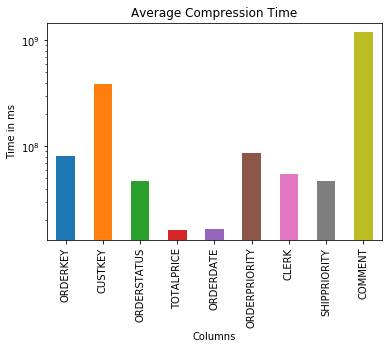

In [11]:
data = pd.read_csv('../data/dictionary/decompression_times.csv', sep=',')
ax = data.apply(pd.Series.mean).plot(kind='bar', title='Average Compression Time', logy=True)
ax.set(xlabel='Columns', ylabel='Time in ms')
ax